In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

In [33]:
centDF = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/pilleHmmer.csv")
centDF

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,sq_len,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,62460029,+,0,2465.7,541.0,-,2852,DYZ18_Yq,2.0,distance bw DYZ18 copies
1,chrY,-,Yqhet_3.1kb,-,615,2205,27462965,27464556,27462962,27464558,62460029,+,0,1208.2,313.8,-,1591,DYZ18_Yq,NaN,NaN
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,62460029,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2.0,NaN
3,chrY,-,Yqhet_3.1kb,-,633,2206,27465827,27467376,27465823,27467377,62460029,+,0,1192.4,305.9,-,1549,DYZ18_Yq,NaN,NaN
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,62460029,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,chrY,-,DYZ1_Yq,-,1,3582,61994853,61991357,61994853,61991355,62460029,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,NaN,NaN
11594,chrY,-,Yqhet_2.7kb,-,459,2619,61996148,61998334,61996144,61998344,62460029,+,0,1726.4,364.6,-,2186,DYZ1_Yq,NaN,NaN
11595,chrY,-,DYZ1_Yq,-,1,3583,61998397,61994855,61998397,61994854,62460029,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,NaN,NaN
11596,chrY,-,Yqhet_2.7kb,-,459,2598,61999677,62001836,61999672,62001840,62460029,+,0,1694.1,360.7,-,2159,DYZ1_Yq,NaN,NaN


In [34]:
centDF.loc[372]

target                                chrY
accession                                -
query                          Yqhet_2.7kb
accession.1                              -
hmmfrom                                459
hmmto                                 2600
alifrom                           28039536
alito                             28041683
envfrom                           28039528
envto                             28041688
sq_len                            62460029
strant                                   +
E-value                                  0
score                               1774.6
bias                                 362.3
description of target                    -
Unnamed: 16                           2147
Repeat array def from Pille        DYZ1_Yq
Distance                               NaN
Unnamed: 19                            NaN
Name: 372, dtype: object

In [35]:
for row in centDF.index:
    if centDF.at[row,'strant'] == '-':
        start = int(centDF.at[row,'alito'])
        end = int(centDF.at[row,'alifrom'])
        
        centDF.at[row,'alifrom'] = start
        centDF.at[row,'alito'] = end

        
    else:
        continue

In [36]:
centDF['Distance'] = 0
lastRow =0
flag=0
for row in centDF.index:
    if flag == 0:
        lastRow = row
        flag+=1
        continue
    else:
        centDF.at[row,'Distance'] = int(centDF.at[row,'alifrom'])-int(centDF.at[lastRow,'alito'])
        lastRow = row
        continue

In [37]:
SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3.1kb':3120, 'Yqhet_2.7kb':2767}

In [421]:
number=0
centDF['Unique_Identifier']= 'temp'
for row in centDF.index:
    centDF.at[row,'Unique_Identifier'] = number
    number+=1
centDF2 = centDF.copy() 
#centDF2 = centDF2.loc[600:900].copy()

In [422]:
centDF2.reset_index(drop=True, inplace=True)
centDF2['Distance'] = 0
lastRow =0
flag=0
for row in centDF2.index:
    if flag == 0:
        lastRow = row
        flag+=1
    else:
        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
        lastRow = row
centDF2

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,...,+,0,2465.7,541.0,-,2852,DYZ18_Yq,0,distance bw DYZ18 copies,0
1,chrY,-,Yqhet_3.1kb,-,615,2205,27462965,27464556,27462962,27464558,...,+,0,1208.2,313.8,-,1591,DYZ18_Yq,-2569,NaN,1
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,...,+,0,2448.0,542.7,-,2842,DYZ18_Yq,980,NaN,2
3,chrY,-,Yqhet_3.1kb,-,633,2206,27465827,27467376,27465823,27467377,...,+,0,1192.4,305.9,-,1549,DYZ18_Yq,-2551,NaN,3
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,...,+,0,2405.6,546.7,-,2846,DYZ18_Yq,1004,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,-3466,NaN,11593
11594,chrY,-,Yqhet_2.7kb,-,459,2619,61996148,61998334,61996144,61998344,...,+,0,1726.4,364.6,-,2186,DYZ1_Yq,1295,NaN,11594
11595,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,-3479,NaN,11595
11596,chrY,-,Yqhet_2.7kb,-,459,2598,61999677,62001836,61999672,62001840,...,+,0,1694.1,360.7,-,2159,DYZ1_Yq,1280,NaN,11596


In [423]:
start = 0
end = 1
goodRows = []
lastGoodEnd = 'temp'
while (centDF2['Distance'].values < 0).any():
        
    try:
    
        if (centDF2.loc[start:end]['Distance'].values < 0).any():
            
            firstQueryName = str(centDF2.loc[start]['query'].strip())
            firstQueryHMMLength = float(int(centDF2.loc[start]['hmmto'])-int(centDF2.loc[start]['hmmfrom'])/int(SizeBlockDict[firstQueryName]))
            firstQueryScore = float(centDF2.loc[start]['score'])
            rowNameOne = start
            firstQueryStart = int(centDF2.loc[start]['alifrom'])
            firstQueryEnd = int(centDF2.loc[start]['alito'])

            SecondQueryName = str(centDF2.loc[end]['query'].strip())
            SecondQueryHMMLength = float(int(centDF2.loc[end]['hmmto'])-int(centDF2.loc[end]['hmmfrom'])/int(SizeBlockDict[SecondQueryName]))
            SecondQueryScore = float(centDF2.loc[end]['score'])
            rowNameTwo = end
            SecondQueryStart = int(centDF2.loc[end]['alifrom'])
            SecondQueryEnd = int(centDF2.loc[end]['alito'])

            
            #print(firstQueryHMMLength)
            #print(SecondQueryHMMLength)
            
            
            if firstQueryHMMLength > SecondQueryHMMLength:
                centDF2.drop(index=[end], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue

            elif SecondQueryHMMLength > firstQueryHMMLength:
                #print('eye')
                centDF2.drop(index=[start], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue      

            elif SecondQueryHMMLength == firstQueryHMMLength:
                centDF2.drop(index=[end], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue      
            
            
            else:
                continue
            
        # IF the two rows are one after the other keep the top     
        else:
            
            if lastGoodEnd != 'temp' and firstQueryStart < lastGoodEnd:
                centDF2.drop(index=[start], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue
                        
            elif lastGoodEnd != 'temp' and firstQueryStart >= lastGoodEnd:
                
                goodRows.append(centDF2.at[start,'Unique_Identifier'])
                lastGoodEnd = firstQueryEnd
                centDF2.drop(index=[start], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue  
            else:
                
                goodRows.append(centDF2.at[start,'Unique_Identifier'])
                lastGoodEnd = firstQueryEnd
                centDF2.drop(index=[start], inplace=True)
                centDF2.reset_index(drop=True, inplace=True)
                centDF2['Distance'] = 0
                lastRow =0
                flag=0
                for row in centDF2.index:
                    if flag == 0:
                        lastRow = row
                        flag+=1
                        continue
                    else:
                        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
                        lastRow = row
                        continue 

    except:
        print("EXCEPTION")

for row in centDF2.index:
    try:
        goodRows.append(centDF2.at[row,'Unique_Identifier'])
    except:
        continue

eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye


eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye


eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye
eye


In [425]:
print(len(goodRows))

5708


In [426]:
centDF2 = centDF.loc[goodRows].copy()
centDF2['Distance'] = 0
lastRow =0
flag=0
for row in centDF2.index:
    if flag == 0:
        lastRow = row
        flag+=1
        continue
    else:
        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
        lastRow = row
        continue
centDF2

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,...,+,0,2465.7,541.0,-,2852,DYZ18_Yq,0,distance bw DYZ18 copies,0
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,...,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2,NaN,2
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,...,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2,NaN,4
6,chrY,-,DYZ18_Yq,-,2,2864,27471228,27474074,27471227,27474074,...,+,0,2436.5,556.3,-,2846,DYZ18_Yq,2,NaN,6
8,chrY,-,DYZ18_Yq,-,2,2864,27474076,27476938,27474075,27476938,...,+,0,2513.2,534.1,-,2862,DYZ18_Yq,2,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589,chrY,-,DYZ1_Yq,-,1,3583,61984352,61987858,61987858,61984351,...,-,0,2798.9,568.5,-,-3506,DYZ1_Yq,2,NaN,11589
11591,chrY,-,DYZ1_Yq,-,1,3583,61987860,61991354,61991354,61987859,...,-,0,2816.5,564.2,-,-3494,DYZ1_Yq,2,NaN,11591
11593,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,3,NaN,11593
11595,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,2,NaN,11595


In [430]:
#centDF2.to_csv("/home/mark/Desktop/chromosome_y/centReferences/marksHMMERFilter4.csv")

In [427]:
negatives = []
for row in centDF2.index:
    if centDF2.at[row,'Distance'] < 0:
        negatives.append(centDF2.at[row,'Distance'])

(array([ 3.,  0.,  4.,  4.,  0.,  2.,  2., 21., 39., 25.]),
 array([-42. , -38.7, -35.4, -32.1, -28.8, -25.5, -22.2, -18.9, -15.6,
        -12.3,  -9. ]),
 <BarContainer object of 10 artists>)

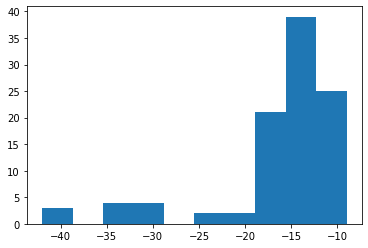

In [428]:
plt.hist(negatives)

In [429]:
centDF2[centDF2['Distance']<-0]

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
1254,chrY,-,DYZ1_Yq,-,1,3264,29666557,29669785,29669785,29666556,...,-,0,2778.8,531.6,-,-3228,DYZ1_Yq,-32,NaN,1254
1270,chrY,-,DYZ1_Yq,-,1,3386,29694090,29697435,29697435,29694089,...,-,0,2891.2,558.2,-,-3345,DYZ1_Yq,-13,NaN,1270
1342,chrY,-,DYZ1_Yq,-,1,3202,29821305,29824476,29824476,29821304,...,-,0,2745.2,531.5,-,-3171,DYZ1_Yq,-12,NaN,1342
2005,chrY,-,DYZ1_Yq,-,1,3264,31200339,31203562,31203562,31200337,...,-,0,2723.1,536.2,-,-3223,DYZ1_Yq,-23,NaN,2005
2378,chrY,-,DYZ1_Yq,-,1,3264,32020624,32023852,32023852,32020622,...,-,0,2726.6,546.1,-,-3228,DYZ1_Yq,-17,NaN,2378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,chrY,-,DYZ1_Yq,-,7,3583,61903738,61907245,61907247,61903737,...,-,0,2741.6,578.1,-,-3507,DYZ1_Yq,-12,NaN,11543
11545,chrY,-,DYZ1_Yq,-,7,3583,61907233,61910740,61910742,61907232,...,-,0,2737.6,578.9,-,-3507,DYZ1_Yq,-12,NaN,11545
11547,chrY,-,DYZ1_Yq,-,4,3583,61910728,61914238,61914239,61910727,...,-,0,2736.1,578.3,-,-3510,DYZ1_Yq,-12,NaN,11547
11549,chrY,-,DYZ1_Yq,-,7,3583,61914223,61917789,61917791,61914222,...,-,0,2761.5,573.0,-,-3566,DYZ1_Yq,-15,NaN,11549
